## Possession Visualization -- Calculation Logic
This notebook walks the user through the creation of the Possession visualization. The goal of this visualization is to quickly inform the user about possession percentages. A pie chart was choosen because it is a common, easy to understand by layman visulazation.  The logic for calculating possession is included in this notebook.  A mock-up of the streaming pie-chart is in the R Shiny package.

Image your watching the game and the your opposing team is playing tiki-taka style. After a couple of minitues of them moving the ball from side to side without advancing you become curious about the opposing team's possession percentage. You quickly check the pie chart and return your attention to the game before the opposing team finds the space they have been searching for.

The 2015 Women's World Cup Final game is used in this notebook

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
WWC = pd.read_csv('usa-japan.csv')
WWC["SecInGame"]=WWC['period_min']*60+WWC['period_second']
WWC.sort('SecInGame', inplace=True)

Possession Calculation Logic:


In [3]:
WWC['Delta_Second']=WWC['SecInGame']-WWC['SecInGame'].shift(1)
col=['event_type','team','period_min','period_second','SecInGame','Delta_Second','outcome']

In [4]:
WWC[col].head(15)

event_type         team  period_min  period_second  SecInGame  \
0              Start  Japan Women           0              0          0   
1577             End    USA Women           0              0          0   
1576             End  Japan Women           0              0          0   
1575  Collection end  Japan Women           0              0          0   
1574  Collection end    USA Women           0              0          0   
1578     Team set up  Japan Women           0              0          0   
1579     Team set up    USA Women           0              0          0   
1              Start    USA Women           0              0          0   
2               Pass  Japan Women           0              3          3   
3               Pass  Japan Women           0              5          5   
4               Pass  Japan Women           0              7          7   
6             Aerial    USA Women           0              9          9   
5             Aerial  Japan Women           0              9          9   
7               Pass    USA Women           0             10         10   
9               Pass    USA Women           0             12         12   

      Delta_Second  outcome  
0              NaN        1  
1577             0        1  
1576             0        1  
1575             0        1  
1574             0        1  
1578             0        1  
1579             0        1  
1                0        1  
2                3        1  
3                2        1  
4                2        0  
6                2        1  
5                0        0  
7                1        1  
9                2        1

In [5]:
WWC['Poss_home']=0
WWC['Poss_away']=0

In [6]:
Home = int(WWC['home_team'].unique()[0][1:])
Away = int(WWC['away_team'].unique()[0][1:])
print (Home, Away)

(6238, 6232)


In [7]:
possTeam=''
dependsOnOutcome = [4,5,6,44] #Foul, Out, Corner Awarded, Aerial
stopClock = [16,30] # Goal, End
skipEvent = [70,17,40] # Injury Time Announcment, Card, Formation Change
TotalPoss={Home:0,Away:0}
teamColumnHold={Home:'Poss_home',Away:'Poss_away'}
for index, row in WWC.iterrows():
    if possTeam=='':
        if row['SecInGame']>0:
            possTeam=row['team_id']
    else:
        event=row['event_type_id']
        if event in stopClock:
            possTeam=''
        elif event in skipEvent:
            continue
        elif event in dependsOnOutcome:
            if row['outcome']==0:
                continue
            else:
                possTeam = row['team_id']
                TotalPoss[possTeam]+=row['Delta_Second']
  
        else:
            possTeam=row['team_id']
            TotalPoss[possTeam]+=row['Delta_Second']
                
    WWC.at[index,teamColumnHold[Home]]=TotalPoss[Home]
    WWC.at[index,teamColumnHold[Away]]=TotalPoss[Away]
                    
        

In [8]:
col=['event_type','team','SecInGame','Delta_Second','outcome','Poss_home','Poss_away']
WWC[col].head(40)

event_type         team  SecInGame  Delta_Second  outcome  \
0              Start  Japan Women          0           NaN        1   
1577             End    USA Women          0             0        1   
1576             End  Japan Women          0             0        1   
1575  Collection end  Japan Women          0             0        1   
1574  Collection end    USA Women          0             0        1   
1578     Team set up  Japan Women          0             0        1   
1579     Team set up    USA Women          0             0        1   
1              Start    USA Women          0             0        1   
2               Pass  Japan Women          3             3        1   
3               Pass  Japan Women          5             2        1   
4               Pass  Japan Women          7             2        0   
6             Aerial    USA Women          9             2        1   
5             Aerial  Japan Women          9             0        0   
7               Pass    USA Women         10             1        1   
9               Pass    USA Women         12             2        1   
8      Ball recovery    USA Women         12             0        1   
10              Pass    USA Women         20             8        1   
11              Pass    USA Women         22             2        1   
12              Pass    USA Women         24             2        1   
13              Pass    USA Women         28             4        0   
14         Clearance  Japan Women         28             0        1   
15              Pass    USA Women         32             4        1   
16              Pass    USA Women         41             9        0   
17         Clearance  Japan Women         42             1        1   
18         Clearance  Japan Women         44             2        1   
19              Pass    USA Women         48             4        0   
20    Keeper pick-up  Japan Women         72            24        1   
21              Pass  Japan Women         77             5        0   
22              Pass    USA Women         80             3        0   
23              Pass  Japan Women         82             2        0   
25            Aerial    USA Women         83             1        1   
24            Aerial  Japan Women         83             0        0   
26              Pass    USA Women         84             1        1   
27              Pass  Japan Women         88             4        1   
28      Ball touched  Japan Women         92             4        0   
29     Ball recovery    USA Women         93             1        1   
30              Pass    USA Women         97             4        1   
31              Pass    USA Women        102             5        1   
32              Pass    USA Women        110             8        1   
33              Pass    USA Women        115             5        1   

      Poss_home  Poss_away  
0             0          0  
1577          0          0  
1576          0          0  
1575          0          0  
1574          0          0  
1578          0          0  
1579          0          0  
1             0          0  
2             0          0  
3             0          2  
4             0          4  
6             2          4  
5             0          0  
7             3          4  
9             5          4  
8             5          4  
10           13          4  
11           15          4  
12           17          4  
13           21          4  
14           21          4  
15           25          4  
16           34          4  
17           34          5  
18           34          7  
19           38          7  
20           38         31  
21           38         36  
22           41         36  
23           41         38  
25           42         38  
24            0          0  
26           43         38  
27           43         42  
28           43         46  
29           44         46  
30           48         4

In [9]:
WWC[col].to_csv('CheckPossessionLogic.csv',index=False)

In [10]:
WWC['Poss_total']=WWC['Poss_home']+WWC['Poss_away']
WWC['Percent_Poss_home']=WWC['Poss_home']/WWC['Poss_total']
WWC['Percent_Poss_away']=WWC['Poss_away']/WWC['Poss_total']

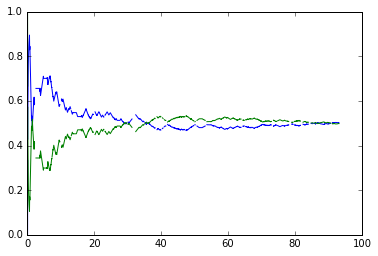

In [11]:
plt.plot(WWC['SecInGame']/60,WWC['Percent_Poss_home'])
plt.plot(WWC['SecInGame']/60,WWC['Percent_Poss_away'])

** NOTE: A mock-up of the streaming pie-chart is in the R Shiny package. **